In [1]:
import os

base_dir = 'C:/Users/m477a/JupyterNote/task_prof_tsou/NEU Surface Defect Database/IMAGES'
data_dir = os.path.join(base_dir, 'train')

In [2]:
# see the data class or separated files
os.listdir(data_dir)

['crazing',
 'inclusion',
 'patches',
 'pitted_surface',
 'rolled-in_scale',
 'scratches']

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data normalization using ImageDataGenerator 
# actually the data need to be normalize before get into the neural network
train_data_generator = ImageDataGenerator(
     rescale = 1.255,
     rotation_range = 20,
     horizontal_flip = True,
     shear_range = 0.2,
     fill_mode = 'wrap',
     validation_split = 0.3)
#      validation_split = 0.4) # 6:4 (train:validation)

### Splitting the data into Validation and Train

In [4]:
train_generator = train_data_generator.flow_from_directory(
    data_dir,
    target_size=(200, 200),
    shuffle = True,
    subset = 'training')

validation_generator = train_data_generator.flow_from_directory(
    data_dir,
    target_size=(200, 200),
    subset = 'validation')

Found 1242 images belonging to 6 classes.
Found 528 images belonging to 6 classes.


### Make a Model

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax')) # put the number of your classification class

In [6]:
model.summary()
# we can see the detail of layer inside our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
print(type(train_generator))
print(type(validation_generator))

<class 'keras.preprocessing.image.DirectoryIterator'>
<class 'keras.preprocessing.image.DirectoryIterator'>


### Training the model

In [9]:
model = model.fit(
    train_generator,
    steps_per_epoch=30, # 25
    epochs=10,
    validation_data=validation_generator,
    validation_steps=5, # 5
    verbose=2
)

Epoch 1/10
30/30 - 52s - loss: 29.3993 - accuracy: 0.2254 - val_loss: 1.7773 - val_accuracy: 0.2562 - 52s/epoch - 2s/step
Epoch 2/10
30/30 - 51s - loss: 1.6493 - accuracy: 0.3428 - val_loss: 1.7616 - val_accuracy: 0.2438 - 51s/epoch - 2s/step
Epoch 3/10
30/30 - 50s - loss: 2.0479 - accuracy: 0.2746 - val_loss: 1.6682 - val_accuracy: 0.2625 - 50s/epoch - 2s/step
Epoch 4/10
30/30 - 51s - loss: 1.7843 - accuracy: 0.1845 - val_loss: 1.7960 - val_accuracy: 0.2000 - 51s/epoch - 2s/step
Epoch 5/10
30/30 - 52s - loss: 1.7794 - accuracy: 0.1866 - val_loss: 1.7554 - val_accuracy: 0.1937 - 52s/epoch - 2s/step
Epoch 6/10
30/30 - 51s - loss: 2.2596 - accuracy: 0.1992 - val_loss: 1.7285 - val_accuracy: 0.2062 - 51s/epoch - 2s/step
Epoch 7/10
30/30 - 51s - loss: 1.8392 - accuracy: 0.2138 - val_loss: 1.7461 - val_accuracy: 0.2125 - 51s/epoch - 2s/step
Epoch 8/10
30/30 - 51s - loss: 2.3860 - accuracy: 0.1813 - val_loss: 1.7916 - val_accuracy: 0.2062 - 51s/epoch - 2s/step
Epoch 9/10
30/30 - 51s - loss: 

### Evaluation

In [13]:
# model.evaluate(train_generator, verbose=2)

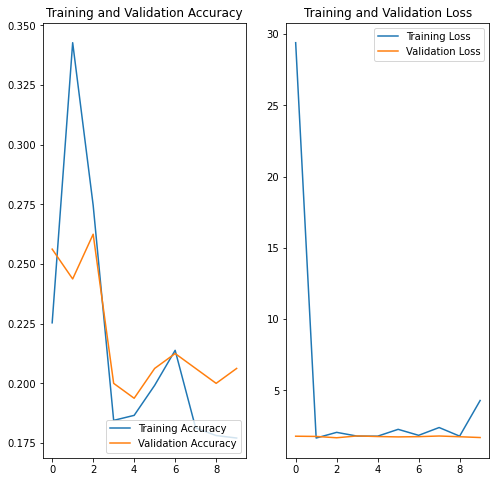

In [12]:
import matplotlib.pyplot as plt

epochs = 10

acc = model.history['accuracy']
val_acc = model.history['val_accuracy']

loss = model.history['loss']
val_loss= model.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1) # plt.subplot(1, 2, 2) will merge the result
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()